In [ ]:
#install surprise - write in terminal
pip install scikit-surprise 

In [65]:
# all necessary imports
import pandas as pd
import numpy as np
from surprise.model_selection import train_test_split, cross_validate, GridSearchCV
import matplotlib.pyplot as plt
from surprise import accuracy, Dataset
from surprise import SVD, SVDpp, NMF
from scipy.io import loadmat

In [5]:
# load the data  movielens 
data = Dataset.load_builtin('ml-100k')

Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /Users/olgatsyban/.surprise_data/ml-100k


### Prepare the data

In [6]:
# make a df
data_df = pd.DataFrame(data.raw_ratings, columns=["user_id", "item_id", "rating", "unix_timestamp"])
print(data_df.head())

  user_id item_id  rating unix_timestamp
0     196     242     3.0      881250949
1     186     302     3.0      891717742
2      22     377     1.0      878887116
3     244      51     2.0      880606923
4     166     346     1.0      886397596


In [20]:
# analize data
print("Total No of user in data_df: ", len(data_df.user_id.unique()))
print("Total No of item in data_df: ", len(data_df.item_id.unique()))

print("\nMax rating", data_df.rating.max())
print("Min rating", data_df.rating.min())

rating_per_user = data_df.groupby('user_id').rating.count()
rating_per_item = data_df.groupby('item_id').rating.count()

print("\nMax No of user rating: ", rating_per_user.max())
print("Min No of user rating: ", rating_per_user.min())
print("Mediam No of user rating: ", rating_per_user.median())

print("\nMax No of item rating: ", rating_per_item.max())
print("Min No of item rating: ", rating_per_item.min())
print("Mediam No of item rating: ", rating_per_item.median())

Total No of user in data_df:  943
Total No of item in data_df:  1682

Max rating 5.0
Min rating 1.0

Max No of user rating:  737
Min No of user rating:  20
Mediam No of user rating:  65.0

Max No of item rating:  583
Min No of item rating:  1
Mediam No of item rating:  27.0


### Initialize the models

In [23]:
svd_model = SVD()
svdpp_model = SVDpp()
nmf_model = NMF()

In [27]:
# cross validation
cross_validate(svd_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate(svdpp_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)
cross_validate(nmf_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9308  0.9424  0.9396  0.9354  0.9340  0.9365  0.0041  
MAE (testset)     0.7337  0.7426  0.7383  0.7377  0.7370  0.7379  0.0029  
Fit time          0.55    0.52    0.53    0.53    0.52    0.53    0.01    
Test time         0.06    0.21    0.06    0.06    0.11    0.10    0.06    
Evaluating RMSE, MAE of algorithm SVDpp on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9181  0.9228  0.9203  0.9139  0.9197  0.9190  0.0030  
MAE (testset)     0.7186  0.7224  0.7223  0.7175  0.7238  0.7209  0.0024  
Fit time          10.75   10.74   10.74   10.62   10.73   10.72   0.05    
Test time         1.93    1.94    2.04    1.94    1.93    1.96    0.04    
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (tests

{'test_rmse': array([0.96904955, 0.96350324, 0.96366523, 0.9592316 , 0.96775855]),
 'test_mae': array([0.76082912, 0.75696792, 0.75833808, 0.75404719, 0.76213203]),
 'fit_time': (0.6312909126281738,
  0.670372724533081,
  0.6151349544525146,
  0.6130502223968506,
  0.634289026260376),
 'test_time': (0.12711596488952637,
  0.049848079681396484,
  0.04949522018432617,
  0.10406303405761719,
  0.05040097236633301)}

In [ ]:
# function to work with SVD, SVDpp, NMF
def find_best_parameters(model_class, param_grid, trainset, data):
    grid_search = GridSearchCV(model_class, param_grid, measures=['rmse', 'mae'], cv=3)
    grid_search.fit(data)
    
    print(grid_search.best_params['rmse'])
    print(grid_search.best_params['mae'])

    best_params = grid_search.best_params['rmse']
    best_model = model_class(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
    best_model.fit(trainset)

    predictions = best_model.test(testset)
    rmse_svdpp = accuracy.rmse(predictions)
    print(f'MAE on test set: {mae}')
    print(f'RMSE on test set: {rmse_svd}')

#### SVD

In [29]:
param_grid = {'n_epochs': [5, 10, 15], 'lr_all': [0.002, 0.005, 0.01], 'reg_all': [0.4, 0.6, 0.8]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
grid_search.fit(data)
print(grid_search.best_params['rmse'])
print(grid_search.best_params['mae'])

{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}


In [30]:
# find best parameters
best_params = grid_search.best_params['rmse']
best_model = SVD(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])

In [32]:
# devide data on test and train
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
train_data = trainset.build_testset()
train_df = pd.DataFrame(train_data, columns=["user_id", "item_id", "rating"])

In [33]:
# fit model and find MAE and RMSE
best_model.fit(trainset)
predictions = best_model.test(testset)
mae = accuracy.mae(predictions)
rmse_svd = accuracy.rmse(predictions)
print(f'MAE on test set: {mae}')
print(f'RMSE on test set: {rmse_svd}')

MAE:  0.7667
RMSE: 0.9587
MAE on test set: 0.7667330038999716
RMSE on test set: 0.9587297120280267


In [41]:
# also it can be done by function <find_best_parameters>
find_best_parameters(SVD,param_grid, trainset, data)

{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
RMSE: 0.9587
MAE on test set: 0.7667330038999716
RMSE on test set: 0.9587297120280267


#### SVD++

In [39]:
def find_best_parameters(model_class, param_grid, trainset, data):
    grid_search = GridSearchCV(model_class, param_grid, measures=['rmse', 'mae'], cv=3)
    grid_search.fit(data)
    
    print(grid_search.best_params['rmse'])
    print(grid_search.best_params['mae'])

    best_params = grid_search.best_params['rmse']
    best_model = model_class(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'])
    best_model.fit(trainset)

    predictions = best_model.test(testset)
    rmse_svdpp = accuracy.rmse(predictions)
    print(f'MAE on test set: {mae}')
    print(f'RMSE on test set: {rmse_svd}')


In [40]:
find_best_parameters(SVDpp,param_grid, trainset, data)

{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
{'n_epochs': 15, 'lr_all': 0.01, 'reg_all': 0.4}
RMSE: 0.9587
MAE on test set: 0.7667330038999716
RMSE on test set: 0.9587297120280267


#### NMF

In [53]:
def find_best_parameters_nmf(model_class, param_grid, trainset, data):
    grid_search = GridSearchCV(model_class, param_grid, measures=['rmse', 'mae'], cv=3)
    grid_search.fit(data)
    
    print(grid_search.best_params['rmse'])
    print(grid_search.best_params['mae'])

    best_params = grid_search.best_params['rmse']
    best_model = model_class( 
                             n_epochs=best_params['n_epochs'], 
                             
                             reg_pu=best_params['reg_pu'], 
                             reg_qi=best_params['reg_qi'],
                             lr_bu=best_params['lr_bu'],
                             lr_bi=best_params['lr_bi'])
    best_model.fit(trainset)

    predictions = best_model.test(testset)
    rmse = accuracy.rmse(predictions)
    mae = accuracy.mae(predictions)
    print(f'MAE on test set: {mae}')
    print(f'RMSE on test set: {rmse}')
#biased=best_params['biased'], 

In [54]:
param_grid_nmf = {
              'n_epochs': [5, 10, 15],
              
              'reg_pu': [0.02, 0.04, 0.06],
              'reg_qi': [0.02, 0.04, 0.06],
              'lr_bu': [0.002, 0.005, 0.01],
              'lr_bi': [0.002, 0.005, 0.01]}
find_best_parameters_nmf(NMF,param_grid_nmf, trainset, data)
#'biased': [True, False],

{'n_epochs': 10, 'reg_pu': 0.06, 'reg_qi': 0.06, 'lr_bu': 0.002, 'lr_bi': 0.002}
{'n_epochs': 10, 'reg_pu': 0.06, 'reg_qi': 0.06, 'lr_bu': 0.002, 'lr_bi': 0.002}
RMSE: 0.9977
MAE:  0.7719
MAE on test set: 0.7718763069996563
RMSE on test set: 0.9976737919868177


### Analysis results of SVD, SVD++, NMF

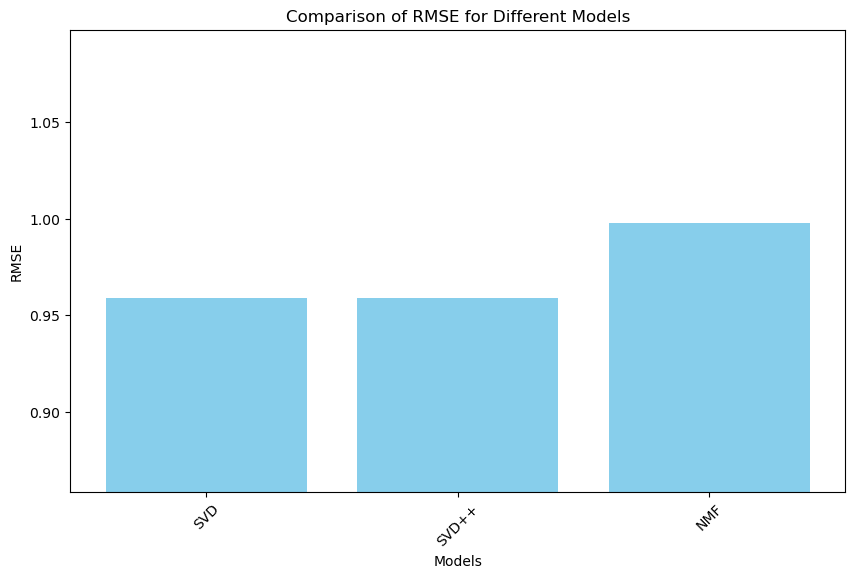

In [56]:
# diagram for comparing RMSE results for each model
models = ['SVD', 'SVD++', 'NMF']
rmse_scores = [0.9587297120280267, 0.9587297120280267, 0.9976737919868177]

plt.figure(figsize=(10, 6))
plt.bar(models, rmse_scores, color='skyblue')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.title('Comparison of RMSE for Different Models')
plt.ylim(min(rmse_scores) - 0.1, max(rmse_scores) + 0.1)
plt.xticks(rotation=45)
plt.show()

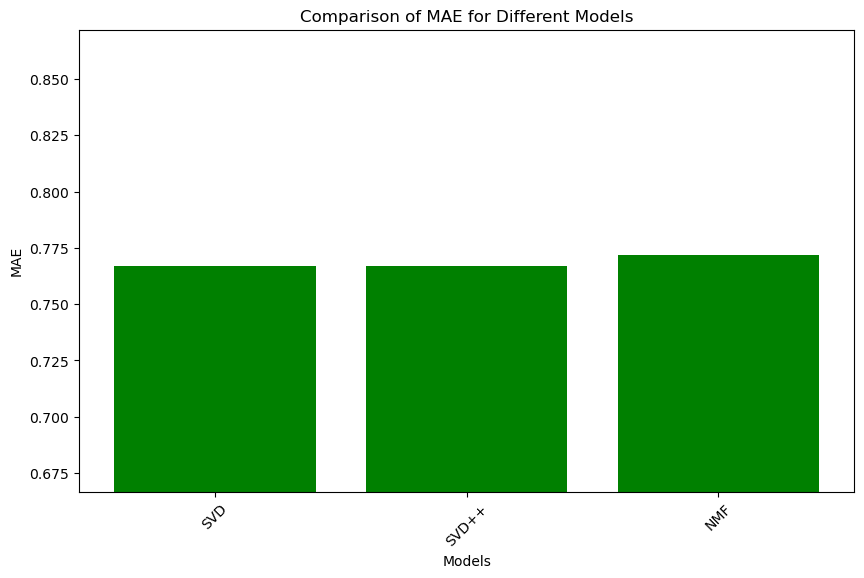

In [55]:
# diagram for comparing MAE results for each model
models = ['SVD', 'SVD++', 'NMF']
mae_scores = [0.7667330038999716, 0.7667330038999716, 0.7718763069996563]

plt.figure(figsize=(10, 6))
plt.bar(models, mae_scores, color='green')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.title('Comparison of MAE for Different Models')
plt.ylim(min(mae_scores) - 0.1, max(mae_scores) + 0.1)
plt.xticks(rotation=45)
plt.show()

### Load data

In [57]:
movie_ids = '/Users/olgatsyban/Downloads/movie_ids.txt'

In [58]:
def loadMovieList(data):
    """
    Reads the fixed movie list in movie_ids.txt and returns a list of movie names.
    Returns
    -------
    movieNames : list
        A list of strings, representing all movie names.
    """
    # Read the fixed movieulary list
    with open(data,  encoding='ISO-8859-1') as fid:
        movies = fid.readlines()

    movieNames = []
    for movie in movies:
        parts = movie.split()
        movieNames.append(' '.join(parts[1:]).strip())
    return movieNames

In [69]:
names = loadMovieList(movie_ids)
names_df = pd.DataFrame(names).rename(lambda x: 'Movie name', axis=1).rename_axis('Movie Number')
print(names_df.head())

                     Movie name
Movie Number                   
0              Toy Story (1995)
1              GoldenEye (1995)
2             Four Rooms (1995)
3             Get Shorty (1995)
4                Copycat (1995)


### Recomendation system

In this part of the exercise, you will implement the collaborative filtering learning algorithm and apply it to a dataset of movie ratings (MovieLens 100k Dataset from GroupLens Research). This dataset consists of ratings on a scale of 1 to 5. The dataset has  𝑛𝑢=943  users, and  𝑛𝑚=1682  movies. In the next parts of this exercise, you will implement the function cofiCostFunc that computes the collaborative filtering objective function and gradient. After implementing the cost function and gradient, you will use scipy.optimize.minimize to learn the parameters for collaborative filtering.

### 2.1 Movie ratings dataset

The next cell will load the dataset movies.mat, providing the variables Y and R. The matrix Y (a num_movies  ×  num_users matrix) stores the ratings  𝑦(𝑖,𝑗)  (from 1 to 5). The matrix R is an binary-valued indicator matrix, where  𝑅(𝑖,𝑗)=1  if user  𝑗  gave a rating to movie  𝑖 , and  𝑅(𝑖,𝑗)=0  otherwise. The objective of collaborative filtering is to predict movie ratings for the movies that users have not yet rated, that is, the entries with  𝑅(𝑖,𝑗)=0 . This will allow us to recommend the movies with the highest predicted ratings to the user.To help you understand the matrix Y, the following cell will compute the average movie rating for the first movie (Toy Story) and print its average rating.

### Load movies.mat

In [61]:
movies = '/Users/olgatsyban/Downloads/movies.mat'

Average rating for movie 1601 ( Office Killer (1997) ): 0.000000 / 5


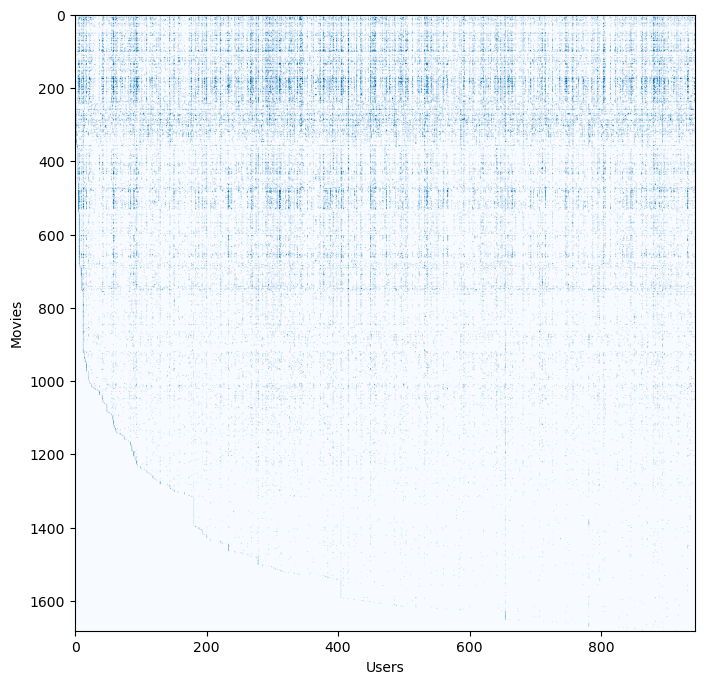

In [72]:
data = loadmat(movies)
Y, R = data['Y'], data['R']

# Y is a 1682x943 matrix, containing ratings (1-5) of 
# 1682 movies on 943 users

# R is a 1682x943 matrix, where R(i,j) = 1 
# if and only if user j gave a rating to movie i

# From the matrix, we can compute statistics like average rating.
print('Average rating for movie 1601 (',names[1600] ,'): %f / 5' %
      np.mean(Y[1600, R[0, :]]))

# We can "visualize" the ratings matrix by plotting it with imshow
plt.figure(figsize=(8, 8))
plt.imshow(Y, cmap='Blues', aspect='auto')
plt.ylabel('Movies')
plt.xlabel('Users')
plt.grid(False)

Throughout this part of the exercise, you will also be working with the matrices, X and W:

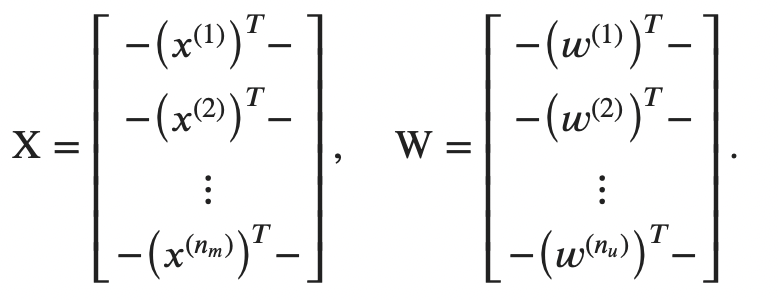

The  𝑖𝑡ℎ  row of X corresponds to the feature vector  𝑥(𝑖)  for the  𝑖𝑡ℎ  movie, and the  𝑗𝑡ℎ  row of W corresponds to one parameter vector  𝑤(𝑗) , for the  𝑗𝑡ℎ  user. Both  𝑥(𝑖)  and  𝑤(𝑗)  are n-dimensional vectors. For the purposes of this exercise, you will use  𝑛=100 , and therefore,  𝑥(𝑖)∈ℝ100 and  𝑤(𝑗)∈ℝ100 . Correspondingly, X is a  𝑛𝑚×100  matrix and W is a  𝑛𝑢×100  matrix.

### 2.2 Collaborative filtering learning algorithm

Now, you will start implementing the collaborative filtering learning algorithm. You will start by implementing the cost function (without regularization).
The collaborative filtering algorithm in the setting of movie recommendations considers a set of n-dimensional parameter vectors  𝑥(1),…,𝑥(𝑛𝑚)  and  𝑤(1),…,𝑤(𝑛𝑢) , where the model predicts the rating for movie  𝑖  by user  𝑗  as  𝑦(𝑖,𝑗)=(𝑤(𝑗))𝑇𝑥(𝑖) . Given a dataset that consists of a set of ratings produced by some users on some movies, you wish to learn the parameter vectors  𝑥(1),…,𝑥(𝑛𝑚),𝑤(1),…,𝑤(𝑛𝑢) that produce the best fit (minimizes the squared error).
You will complete the code in cofiCostFunc to compute the cost function and gradient for collaborative filtering. Note that the parameters to the function (i.e., the values that you are trying to learn) are X and W. In order to use an off-the-shelf minimizer such as scipy's minimize function, the cost function has been set up to unroll the parameters into a single vector called params. You had previously used the same vector unrolling method in the neural networks programming exercise.

### 2.2.1 Collaborative filtering cost function

#### The collaborative filtering cost function (without regularization) is given by

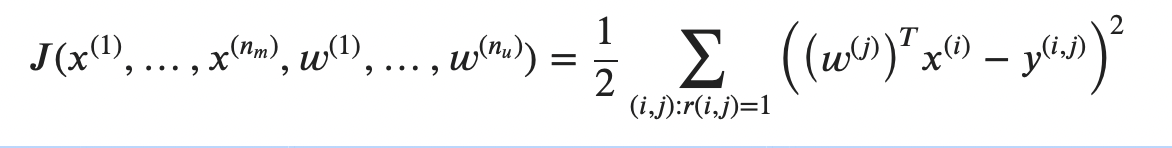

You should now modify the function cofiCostFunc to return this cost in the variable J. Note that you should be accumulating the cost for user  𝑗  and movie  𝑖  only if R[i,j] = 1.

**Implementation Note**: We strongly encourage you to use a vectorized implementation to compute  𝐽 , since it will later by called many times by `scipy`'s optimization package. As usual, it might be easiest to first write a non-vectorized implementation (to make sure you have the right answer), and the modify it to become a vectorized implementation (checking that the vectorization steps do not change your algorithm’s output). To come up with a vectorized implementation, the following tip might be helpful: You can use the  𝑅  matrix to set selected entries to 0. For example, `R * M` will do an element-wise multiplication between `M` and `R`; since `R` only has elements with values either 0 or 1, this has the effect of setting the elements of M to 0 only when the corresponding value in R is 0. Hence, `np.sum( R * M)` is the sum of all the elements of `M` for which the corresponding element in `R` equals 1.

In [82]:
def cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_reg):
    # Extract parameters X and Theta from flattened params
    X = params[:num_movies * num_features].reshape((num_movies, num_features))
    Theta = params[num_movies * num_features:].reshape((num_users, num_features))

    # Compute squared error and apply filtering
    error_squared = np.square(np.dot(X, Theta.T) - Y)
    error_squared_filtered = error_squared * R

    # Compute cost function
    J = 0.5 * np.sum(error_squared_filtered)

    # Regularization terms
    J += (lambda_reg / 2) * (np.sum(np.square(X)) + np.sum(np.square(Theta)))

    # Gradient computation for X and Theta
    grad_X = np.dot(((np.dot(X, Theta.T) - Y) * R), Theta) + lambda_reg * X
    grad_Theta = np.dot(((np.dot(X, Theta.T) - Y) * R).T, X) + lambda_reg * Theta

    # Concatenate gradients into a single vector
    grad = np.concatenate((grad_X.ravel(), grad_Theta.ravel()))

    return J, grad

### 2.2.2 Collaborative filtering gradient

Now you should implement the gradient (without regularization). Specifically, you should complete the code in cofiCostFunc to return the variables X_grad and W_grad. Note that X_grad should be a matrix of the same size as X and similarly, W_grad is a matrix of the same size as W. The gradients of the cost function is given by:

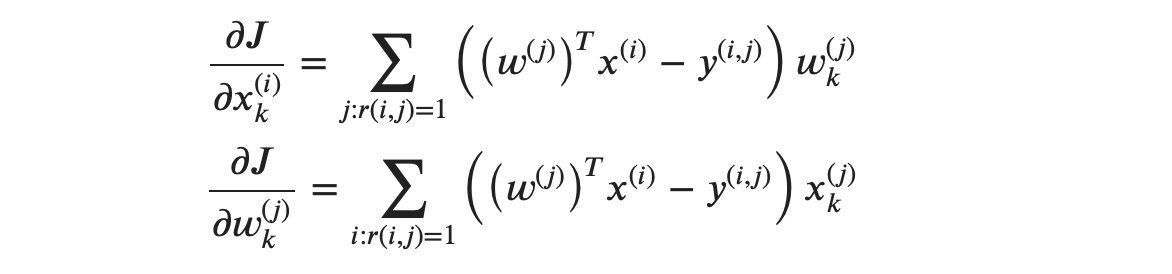

Note that the function returns the gradient for both sets of variables by unrolling them into a single vector. After you have completed the code to compute the gradients, the next cell run a gradient check (available in utils.checkCostFunction) to numerically check the implementation of your gradients (this is similar to the numerical check that you used in the neural networks exercise. If your implementation is correct, you should find that the analytical and numerical gradients match up closely.

**Implementation Note:** You can get full credit for this assignment without using a vectorized implementation, but your code will run much more slowly (a small number of hours), and so we recommend that you try to vectorize your implementation. To get started, you can implement the gradient with a for-loop over movies (for computing  ∂𝐽∂𝑥(𝑖)𝑘 ) and a for-loop over users (for computing  ∂𝐽𝑤(𝑗)𝑘 ). When you first implement the gradient, you might start with an unvectorized version, by implementing another inner for-loop that computes each element in the summation. After you have completed the gradient computation this way, you should try to vectorize your implementation (vectorize the inner for-loops), so that you are left with only two for-loops (one for looping over movies to compute  ∂𝐽∂𝑥(𝑖)𝑘  for each movie, and one for looping over users to compute  ∂𝐽∂𝑤(𝑗)𝑘  for each user).

**Implementation Tip:** To perform the vectorization, you might find this helpful: You should come up with a way to compute all the derivatives associated with  𝑥(𝑖)1,𝑥(𝑖)2,…,𝑥(𝑖)𝑛  (i.e., the derivative terms associated with the feature vector  𝑥(𝑖) ) at the same time. Let us define the derivatives for the feature vector of the  𝑖𝑡ℎ movie as:

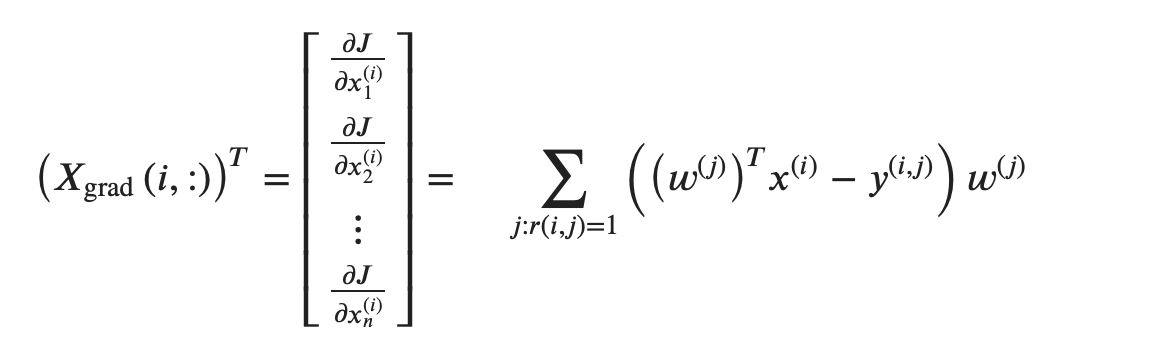

To vectorize the above expression, you can start by indexing into W and Y to select only the elements of interests (that is, those with r[i, j] = 1). Intuitively, when you consider the features for the  𝑖𝑡ℎ  movie, you only need to be concerned about the users who had given ratings to the movie, and this allows you to remove all the other users from W and Y. 

Concretely, you can set idx = np.where(R[i, :] == 1)[0] to be a list of all the users that have rated movie  𝑖 . This will allow you to create the temporary matrices W_temp = W[idx, :] and Y_temp = Y[i, idx] that index into W and Y to give you only the set of users which have rated the  𝑖𝑡ℎ  movie. This will allow you to write the derivatives as: 
X_grad[i, :] = np.dot(np.dot(X[i, :], W_temp.T) - Y_temp, W_temp)


Note that the vectorized computation above returns a row-vector instead. After you have vectorized the computations of the derivatives with respect to  𝑥(𝑖) , you should use a similar method to vectorize the derivatives with respect to  𝑤(𝑗)  as well.

### 2.2.3 Regularized cost function

The cost function for collaborative filtering with regularization is given by

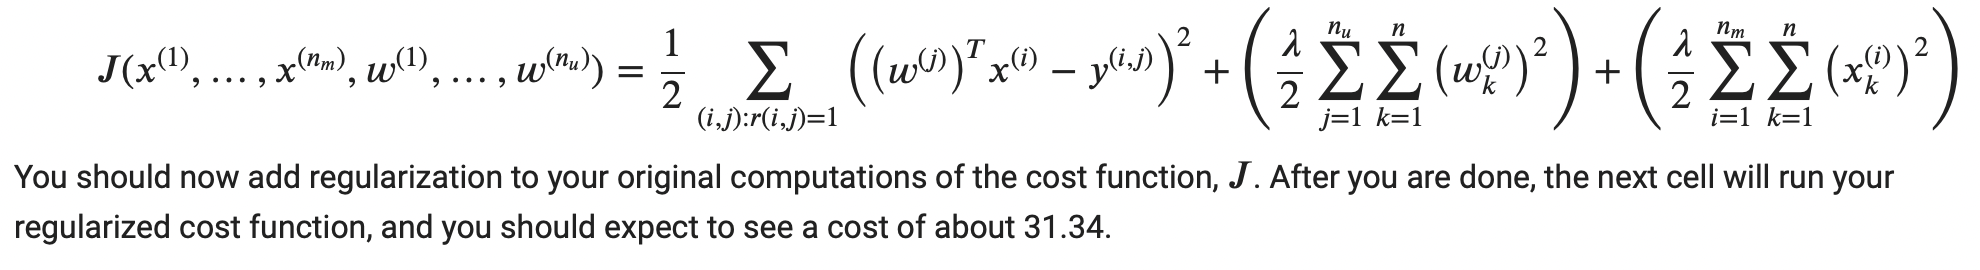

### 2.2.4 Regularized gradient

Now that you have implemented the regularized cost function, you should proceed to implement regularization for the gradient. You should add to your implementation in cofiCostFunc to return the regularized gradient by adding the contributions from the regularization terms. Note that the gradients for the regularized cost function is given by:

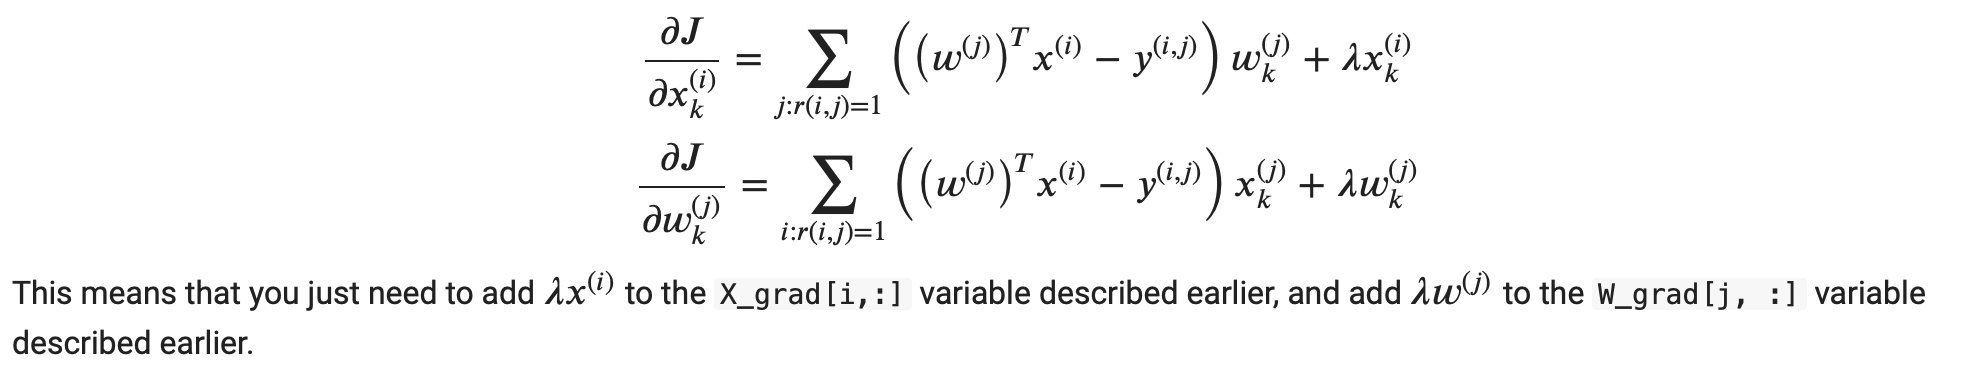

### 2.3 Learning movie recommendations

After you have finished implementing the collaborative filtering cost function and gradient, you can now start training your algorithm to make movie recommendations for yourself. In the next cell, you can enter your own movie preferences, so that later when the algorithm runs, you can get your own movie recommendations! We have filled out some values according to our own preferences, but you should change this according to your own tastes. The list of all movies and their number in the dataset can be found listed in the file Data/movie_idx.txt.

In [77]:
movieList = loadMovieList(movie_ids)
movies_id_list = [0, 97, 6, 11, 53, 63, 65, 68, 182, 225, 354]

for movie in movies_id_list:
  print(movieList[movie])

Toy Story (1995)
Silence of the Lambs, The (1991)
Twelve Monkeys (1995)
Usual Suspects, The (1995)
Outbreak (1995)
Shawshank Redemption, The (1994)
While You Were Sleeping (1995)
Forrest Gump (1994)
Alien (1979)
Die Hard 2 (1990)
Sphere (1998)


### 2.3.1 Recommendations

After the additional ratings have been added to the dataset, the script will proceed to train the collaborative filtering model. This will learn the parameters X and W. To predict the rating of movie  𝑖  for user  𝑗 , you need to compute  (𝑤(𝑗))𝑇𝑥(𝑖)  . The next part of the script computes the ratings for all the movies and users and displays the movies that it recommends (Figure 4), according to ratings that were entered earlier in the script. Note that you might obtain a different set of the predictions due to different random initializations.

In [83]:
from scipy.optimize import minimize

num_users = 943
num_movies = 1682
num_features = 10
learning_rate = 0.001
num_iterations = 100
lambda_reg = 0.1

np.random.seed(0)
X = np.random.rand(num_movies, num_features)
Theta = np.random.rand(num_users, num_features)

initial_params = np.concatenate((X.ravel(), Theta.ravel()))

# Optimize parameters
result = minimize(
    fun=lambda params: cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_reg)[0],
    x0=initial_params,
    jac=lambda params: cofiCostFunc(params, Y, R, num_users, num_movies, num_features, lambda_reg)[1],
    method='CG',
    options={'maxiter': 100}
    )

optimal_params = result.x
X_optimal = optimal_params[:num_movies * num_features].reshape((num_movies, num_features))
Theta_optimal = optimal_params[num_movies * num_features:].reshape((num_users, num_features))


# Movie Recommendations for a User
def recommend_movies(user_index, X, Theta, movieList, top_k=10):
    predicted_ratings = X @ Theta.T
    user_ratings = predicted_ratings[:, user_index]
    sorted_indices = np.argsort(user_ratings)[::-1]
    recommended_movie_indices = sorted_indices[:top_k]
    recommended_movies = [movieList[i] for i in recommended_movie_indices]
    return recommended_movies

# Recommendations for a specific user (e.g., user 0)
user_index = 0
recommended_movies = recommend_movies(user_index, X_optimal, Theta_optimal, movieList)

# Display recommended movies for the user
print("Recommended movies for user {}:".format(user_index))
for i, movie in enumerate(recommended_movies, start=1):
    print("{}. {}".format(i, movie))

Recommended movies for user 0:
1. Aiqing wansui (1994)
2. Wrong Trousers, The (1993)
3. Paths of Glory (1957)
4. Two or Three Things I Know About Her (1966)
5. City of Lost Children, The (1995)
6. Wallace & Gromit: The Best of Aardman Animation (1996)
7. Close Shave, A (1995)
8. Faust (1994)
9. Double vie de Véronique, La (Double Life of Veronique, The) (1991)
10. Saint of Fort Washington, The (1993)


In [86]:
# Find RMSE and MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error

predicted_ratings = X_optimal @ Theta_optimal.T
rmse = np.sqrt(mean_squared_error(Y[R == 1], predicted_ratings[R == 1]))
mae = mean_absolute_error(Y[R == 1], predicted_ratings[R == 1])

print("\nRMSE on the entire dataset:", rmse)
print("MAE on the entire dataset:", mae)


RMSE on the entire dataset: 0.7078644423489772
MAE on the entire dataset: 0.5522572614132224
